# predicting heart disease using machine learning 

* using different libraries and tools we will build a model capable of predicting weather someone has heart disease or not based on there medical attribute

* we are going to take following approach
    1. Problem statement
    2. Data
    3. Evaluation
    4. Features
    5. Moddelling
    6. Experimentation
    
## 1. Poblem defination

> Given with clinical parameters about patient we have to predict that weather patient has heart disease or not

## 2. Data

> The original Data come from  Cleavland  data from the UCI  Machine Learning Repository : https://archive.ics.uci.edu/ml/datasets/heart+disease

## 3. Evaluation 

> if we can reach 95% accuraccy at predicting  then we will persue the project

## 4. Features of the data

* Features of the Given DataFram
    1.  age :  in years
    2.  sex : male = 1, feamle =0
    3.  cp  : chest pain 
            * 0 = Typical angina
            * 1 = Atypical angina
            * 2 = Non-anginal pain
            * 3 = Asymptomatic
    4.  trestbps : blood presuure
    5.  chol :  cholestoral
    6.  fbs  :   fasting blood sugar
    7.  restecg : restecgreating electrocardiographic results 
    8.  thalach : thalachmaximum heart rate achieved
    9.  exang : exangexercise induced angina (yes=1  , no=0)
    10. oldpeak : depression induced by exercise relative to rest
    11. slope : slope of peak exercise
    12. ca  :  number of major vessels (0-3) colored by flourosopy
    13. thal : normal = 3 , fixed defect = 6 , reversable defect = 7
    14. traget : yes = 1 , No = 0
    
## 5. Moddelling


## 6. Experimentation
    
    



In [1]:
## preparing neccessary tools

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn 
import seaborn as sns
%matplotlib inline

## models from scikit-learn
from sklearn.linear_model  import  LogisticRegression
from sklearn.neighbors  import  KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

## model evaluation
from sklearn.model_selection  import  train_test_split , cross_val_score
from sklearn.model_selection  import  RandomizedSearchCV , GridSearchCV
from sklearn.metrics  import  confusion_matrix , classification_report
from sklearn.metrics  import  ConfusionMatrixDisplay
from sklearn.metrics  import  precision_score , f1_score , recall_score
from sklearn.metrics  import  roc_curve
from sklearn.metrics  import  plot_roc_curve

## Importing our data

In [2]:
df = pd.read_csv("heart-disease.csv")

df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


## Data exploring

* finding more features about  the data
    1. weather it has missing values or not.
    2. weather it has catogiral value or not.


In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

* Since the output is balanced hence it is a balnced classsification problem

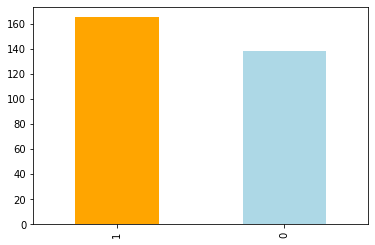

In [5]:
df["target"].value_counts().plot(kind="bar" , color=["orange","lightblue"]);

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


# some of the infor about data

# check weather there are some missing values or not

In [7]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

# no missing values 
* but if existed then we have to deal with the using onehotcoding or remove those rows

In [8]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


# above are some insight about our data

# lets compare some of the column to get more info about our data

In [9]:
pd.crosstab( df.target ,df.sex )

sex,0,1
target,,
0,24,114
1,72,93


* this data showing that 75% of female have heart disease while for male its drop to 50%  based on existing data

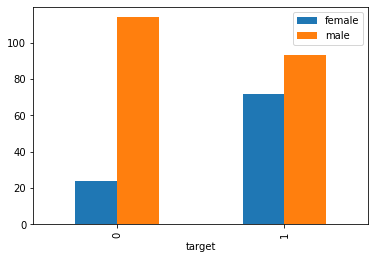

In [10]:
pd.crosstab( df.target ,df.sex ).plot(kind="bar")
plt.legend(["female","male"]);

# comparing some more columns to see what are the patterns present 

In [11]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


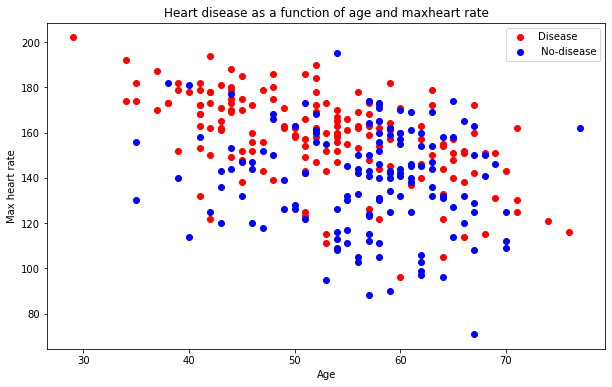

In [12]:
plt.figure(figsize=(10,6))

plt.scatter(df.age[df.target==1] ,
            df.thalach[df.target==1],
            c="red")

plt.scatter(df.age[df.target==0] ,
            df.thalach[df.target==0],
            c="blue")

plt.title("Heart disease as a function of age and maxheart rate")
plt.xlabel("Age")
plt.ylabel("Max heart rate")
plt.legend(["Disease" , " No-disease"]);

* as we can see there is a downward trend but we cant really predict a pattern here our machine learning model will going to come handy and find the pattern which we can't

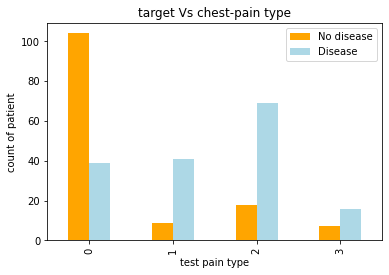

In [13]:
pd.crosstab( df.cp ,df.target).plot(kind="bar",color=["orange" , "lightblue"])
plt.title("target Vs chest-pain type")
plt.xlabel("test pain type")
plt.ylabel("count of patient")
plt.legend(["No disease","Disease"]);

* we can see that Non-anginal pain  cause more disease
* Typical angina  does not cause much damage 

# let's make corelation matrix to understand more about the data

In [14]:
corr_matrix=df.corr()
corr_matrix.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239


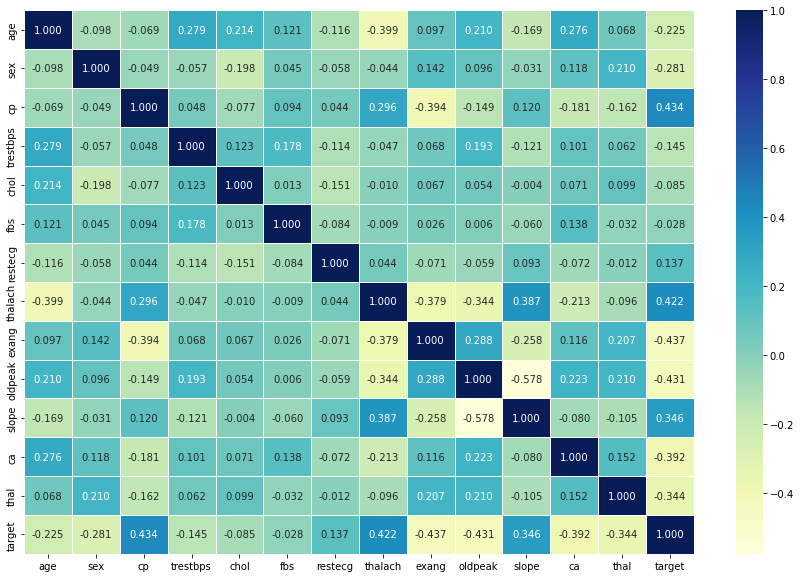

In [15]:
fig ,ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(corr_matrix ,linewidth= 0.5,
                fmt = ".3f",
                cmap = "YlGnBu",
                annot=True);

* we can see on diagoal value is same (1)  that shows that same column match perfectley
* then some other have positive and negative value  which shows the positive and negative corelation between the two column 
* positive corelation means as one value goes up other also increases and vice versa for the negative corelation

# 5.Moddelling

In [16]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


#5.1 make X and y

In [17]:
x = df.drop("target",axis=1)
y = df["target"]

#5.2 split it into train and test set

In [18]:
np.random.seed(42)
x_train , x_test , y_train , y_test = train_test_split(x,y)

# 5.3 choose a model using SK-Learn  Model Map
    *we are going to try three different model and out of those three choose         the best one
        1. RandomForestClassifier
        2. K-nearest Neighbours classifier
        3. logistic Regression(despite its name its a classifiaction model)
      

* in order to avoid re write the code we are going to put our moel in a fxn  and goin to return the disctinary of ther scoring parametrs

In [19]:
models = {"Logistic":LogisticRegression(),
         "KNN" : KNeighborsClassifier(),
         "Randomforest" : RandomForestClassifier()}

# creating a fxn which evalutes all these models

def evaluate_model(models , x_train , x_test , y_train , y_test):
    np.random.seed(42)
    
    model_score = {}
    
    # fitting each model
    
    for name , model in models.items():
        model.fit(x_train , y_train)
        
    # evaluating score and appending in the dictinory
        model_score[name] = model.score(x_test , y_test)
        
    
    return model_score
        
    

In [20]:
scores = evaluate_model(models , x_train , x_test , y_train , y_test);

scores

C:\Users\ACER\Desktop\heart_disease_project1\env\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic': 0.881578947368421,
 'KNN': 0.6973684210526315,
 'Randomforest': 0.8157894736842105}

In [21]:
model_compare = pd.DataFrame(scores , index=["accuracy"])
model_compare

,Logistic,KNN,Randomforest
accuracy,0.881579,0.697368,0.815789


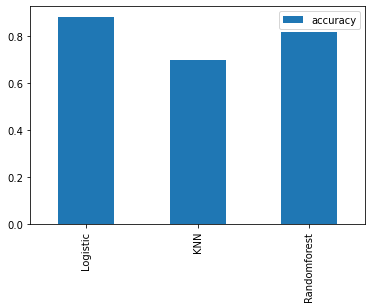

In [22]:
model_compare.T.plot(kind="bar");

* these are base line predcition  
* since  out of these three logistic regression and RnadomForest looks promising so we will cut losse KNN and go forward with remaining two and try to improve their Results

# now we will try to improve our model 
    * Hyperparameter tuning
    * feature importnace 
    * confusion matrix
    * cross validation 
    * precision
    * recall
    * f1-score
    * Classification report
    * ROC Curve
    * Area under ROC curve
    

# hyperparmeter tuning  using Randomized_search_CV 

* we are going to tune logistic regression and Random Forest classifier

In [23]:
logistic_grid = {"C" : np.logspace(-4,4,20),
                 "solver" :["liblinear","sag"] }

rf_grid = {"n_estimators":np.arange(10,1000,50),
           "max_depth": [6,3, None],
              "max_features": [1, 3, 10,5],
              "min_samples_split": [1, 6, 3, 10],
              "min_samples_leaf": [1, 3, 6, 10],
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}

In [24]:
# tune logistic regression

np.random.seed(42)
# make a tuned model

tuned_log_reg = RandomizedSearchCV(LogisticRegression(),
                                   param_distributions=logistic_grid,
                                  cv=5, n_iter=20,
                                  verbose=True)

# fit Tuned Model

tuned_log_reg.fit(x_train , y_train)


Fitting 5 folds for each of 20 candidates, totalling 100 fits


C:\Users\ACER\Desktop\heart_disease_project1\env\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\ACER\Desktop\heart_disease_project1\env\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\ACER\Desktop\heart_disease_project1\env\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\ACER\Desktop\heart_disease_project1\env\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\ACER\Desktop\heart_disease_project1\env\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warni

C:\Users\ACER\Desktop\heart_disease_project1\env\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\ACER\Desktop\heart_disease_project1\env\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\ACER\Desktop\heart_disease_project1\env\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\ACER\Desktop\heart_disease_project1\env\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\ACER\Desktop\heart_disease_project1\env\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warni

RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear', 'sag']},
                   verbose=True)

In [25]:
tuned_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [26]:
tuned_log_reg.score(x_test , y_test)

0.8947368421052632

# this Shows the accuraccy of 89.47% but we are still pretty much bheind our target of 95% so we are going to tune Random forest Model

In [27]:
np.random.seed(42)
    
# set up our model

tuned_Rf = RandomizedSearchCV(estimator=RandomForestClassifier(),
                                   param_distributions=rf_grid,
                                  cv=5, n_iter=50,
                                  verbose=True)

# fit Tuned Model

tuned_Rf.fit(x_train , y_train)


Fitting 5 folds for each of 50 candidates, totalling 250 fits


C:\Users\ACER\Desktop\heart_disease_project1\env\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
50 fits failed out of a total of 250.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\ACER\Desktop\heart_disease_project1\env\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ACER\Desktop\heart_disease_project1\env\lib\site-packages\sklearn\ensemble\_forest.py", line 450, in fit
    trees = Parallel(
  File "C:\Users\ACER\Desktop\heart_disease_project1\env\lib\site-packages\joblib\parallel.py", line 1043, in __call_

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=50,
                   param_distributions={'bootstrap': [True, False],
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': [6, 3, None],
                                        'max_features': [1, 3, 10, 5],
                                        'min_samples_leaf': [1, 3, 6, 10],
                                        'min_samples_split': [1, 6, 3, 10],
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [28]:
# finding best parameters
tuned_Rf.best_params_

{'n_estimators': 360,
 'min_samples_split': 10,
 'min_samples_leaf': 10,
 'max_features': 5,
 'max_depth': 6,
 'criterion': 'gini',
 'bootstrap': True}

In [29]:
# evaluate on those best parameters
tuned_Rf.score(x_train , y_train)

0.8854625550660793

# as we can see even after doing so much tuning random forest is still below logistic regressor so we are going to discared it

# and go ahead with our Logistic regressor

# now we are going to used GridsearchCV on logistic regressor

In [30]:
# setting up parameters
grid_logistic_dict = {"C" : np.logspace(-4,4,30),
                 "solver" :["liblinear","sag"] }

# setting up our model

grid_tuned_model = GridSearchCV(LogisticRegression(),
                                param_grid=grid_logistic_dict,
                                cv=5,
                                verbose=True)

# fit grid tuned model
grid_tuned_model.fit(x_train , y_train)


Fitting 5 folds for each of 60 candidates, totalling 300 fits


C:\Users\ACER\Desktop\heart_disease_project1\env\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\ACER\Desktop\heart_disease_project1\env\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\ACER\Desktop\heart_disease_project1\env\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\ACER\Desktop\heart_disease_project1\env\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\ACER\Desktop\heart_disease_project1\env\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warni

C:\Users\ACER\Desktop\heart_disease_project1\env\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\ACER\Desktop\heart_disease_project1\env\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\ACER\Desktop\heart_disease_project1\env\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\ACER\Desktop\heart_disease_project1\env\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\ACER\Desktop\heart_disease_project1\env\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warni

C:\Users\ACER\Desktop\heart_disease_project1\env\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\ACER\Desktop\heart_disease_project1\env\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\ACER\Desktop\heart_disease_project1\env\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\ACER\Desktop\heart_disease_project1\env\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\ACER\Desktop\heart_disease_project1\env\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warni

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear', 'sag']},
             verbose=True)

In [31]:
# looking for best params

grid_tuned_model.best_params_


{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [32]:
# evaluating
grid_tuned_model.score(x_test , y_test)

0.8947368421052632

# we did hyperparametr tuning but the best we achive is nearly 90% so we are gonna stick with that  and going to evaluate on further evaluation metrics

# now we are going to look beyond accuraccy and look for other evaluation types

* To make comparison we need to make some prediction

In [33]:
y_preds = grid_tuned_model.predict(x_test)
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1], dtype=int64)

In [34]:
y_preds_prob = grid_tuned_model.predict_proba(x_test)
y_preds_prob[:5]

array([[0.84759148, 0.15240852],
       [0.22671632, 0.77328368],
       [0.19113963, 0.80886037],
       [0.94865212, 0.05134788],
       [0.12111297, 0.87888703]])

C:\Users\ACER\Desktop\heart_disease_project1\env\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


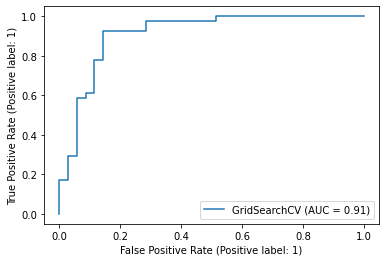

In [35]:
# We Are going to plot the Roc curve

plot_roc_curve(grid_tuned_model , x_test , y_test);

In [36]:
# now we will print confusion matrix
conf = confusion_matrix(y_test , y_preds)
conf

array([[30,  5],
       [ 3, 38]], dtype=int64)

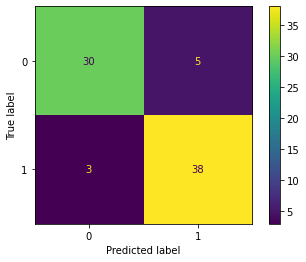

In [37]:
# now we will plot confusion matrix

ConfusionMatrixDisplay.from_predictions(y_test , y_preds);

# lets evaluate on some more factor


* classification report
* cross_validated
    1. precision_score
    2. recall-score
    3. f1_score

In [38]:
# classofiaction report

cl_report = classification_report(y_test , y_preds)
print(cl_report)

              precision    recall  f1-score   support

           0       0.91      0.86      0.88        35
           1       0.88      0.93      0.90        41

    accuracy                           0.89        76
   macro avg       0.90      0.89      0.89        76
weighted avg       0.90      0.89      0.89        76



# calculating evaluation matrix using cross validation using cross_val_score

In [39]:
grid_tuned_model.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [40]:
# we are going to make a new classifier with best hyperparameter

clf = LogisticRegression(C = 0.20433597178569418, solver = 'liblinear')



In [41]:
# cross validated accuracy

cv_acc = cross_val_score(clf , x , y , cv=5 , scoring = "accuracy")
acc_mean = cv_acc.mean()
acc_mean

0.8446994535519124

In [42]:
# cross validated precision

cv_pre = cross_val_score(clf , x , y , cv=5 , scoring = "precision")
pre_mean = cv_pre.mean()
pre_mean


0.8207936507936507

In [43]:
# cross validated recall

cv_recall = cross_val_score(clf , x , y , cv=5 , scoring = "recall")
recall_mean = cv_recall.mean()
recall_mean

0.9212121212121213

In [44]:
# cross validated f1-score

cv_f1 = cross_val_score(clf , x , y , cv=5 , scoring = "f1")
f1_mean = cv_f1.mean()
f1_mean

0.8673007976269721

In [45]:
# visulise our cross validate score

cv_scores = pd.DataFrame({"Accuracy" : acc_mean ,
                          "Precision" : pre_mean,
                          "Recall" : recall_mean,
                          "f1-score" : f1_mean},
                           index=[0])

cv_scores

,Accuracy,Precision,Recall,f1-score
0,0.844699,0.820794,0.921212,0.867301


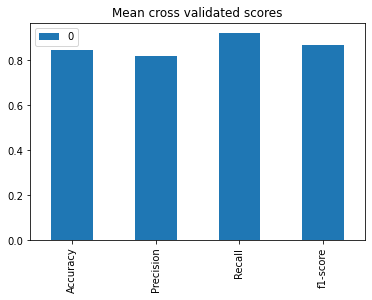

In [46]:
cv_scores.T.plot.bar(title="Mean cross validated scores");

# now our last task to find the feature importance

* This mean that how much a particular feature is contributing towards the outcomes of the Model and how did they contribute

* finding feature important vary model to model since we are using Logisticregression we are goin to find on that basis only

In [47]:
# finding feature importance

# fit the model 
clf.fit(x_train , y_train)

# call for model.coef_
clf.coef_

array([[ 0.00503922, -0.76947823,  0.68812983, -0.00991718, -0.00127897,
         0.00226276,  0.40721864,  0.02147257, -0.60142004, -0.54531813,
         0.45519223, -0.6569426 , -0.70184842]])

In [48]:
# lets match the features to their respective column

features_dict = pd.DataFrame(dict(zip(df.columns , list(clf.coef_[0]))) , index=[0])
features_dict

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,0.005039,-0.769478,0.68813,-0.009917,-0.001279,0.002263,0.407219,0.021473,-0.60142,-0.545318,0.455192,-0.656943,-0.701848


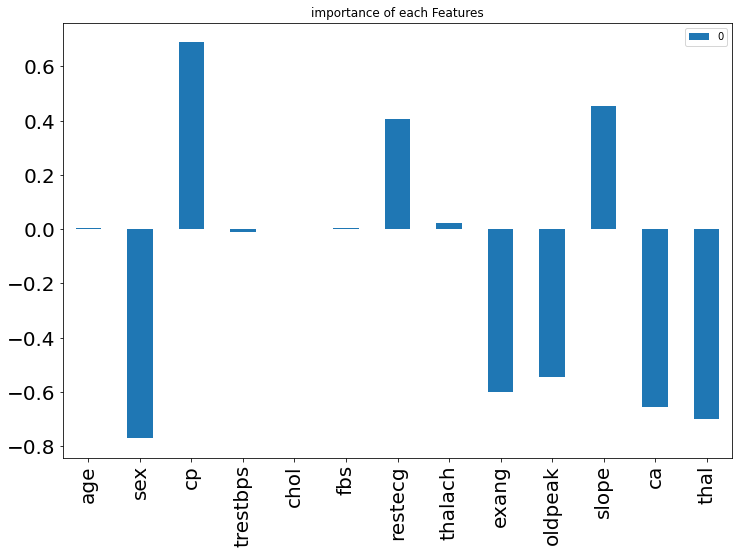

In [49]:
# lets plot these to make'em more understandable

features_dict.T.plot.bar(fontsize=20,
                         title="importance of each Features",
                         figsize = (12,8));

# 6. experimentation

* since we are not able to acheive our goal so we can do few things to acheive that
    1. collect more data
    2. use some more and idfferent model
    3. further tune the model beyond what we have done so far

# saving our model

* using joblib

In [50]:
from joblib import dump , load

dump( grid_tuned_model , filename = "Model to classify Heart disease.joblib")

['Model to classify Heart disease.joblib']